In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()

In [6]:
word_index

{'fuente': 87988,
 'breaker': 17630,
 "helsing'": 57241,
 'musson': 42628,
 'exchanged': 16590,
 'terrorising': 21037,
 'generalised': 44071,
 "marchand's": 59403,
 'ekta': 71739,
 'unleashing': 19225,
 "zechs'": 72821,
 'dingoes': 34772,
 'recall': 2280,
 'duly': 16003,
 'skipable': 77445,
 'inversion': 53459,
 'jitterbugs': 45070,
 'tomato': 10370,
 'rudeboy': 46607,
 'undistinguished': 20144,
 'seamus': 59761,
 'hunk': 9672,
 "husband'": 63962,
 'coustas': 81160,
 'transmits': 34387,
 'frokost»': 65588,
 'drive': 1275,
 'andress': 32591,
 'smudged': 46185,
 'replayed': 26520,
 'walid': 79469,
 'clearances': 85016,
 "dupre's": 64360,
 'camara': 73843,
 'misfits': 10040,
 'setton': 48630,
 'nonintentional': 87738,
 'backbiting': 37292,
 'soundbites': 59013,
 "uwe's": 53202,
 'bribing': 35234,
 'boriqua': 85757,
 'barbecue': 25107,
 'amphlett': 81057,
 'kossack': 55913,
 'enslin': 27807,
 'keifer': 25841,
 'ft13th': 56456,
 'opiate': 70118,
 'allegation': 80097,
 'befriending': 24126,


In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
reverse_word_index

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

In [9]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [15]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [16]:
np.shape(x_train)

(25000, 10000)

In [17]:
np.shape(y_train)

(25000,)

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [19]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
x_val = x_train[:10000]

In [21]:
np.shape(x_val)

(10000, 10000)

In [23]:
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
y_val[0]

1.0

In [27]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 270us/step - loss: 0.4976 - acc: 0.7953 - val_loss: 0.3717 - val_acc: 0.8722
Epoch 2/20
15000/15000 [==============================] - 3s 214us/step - loss: 0.2957 - acc: 0.9046 - val_loss: 0.2990 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 3s 213us/step - loss: 0.2160 - acc: 0.9286 - val_loss: 0.3088 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 4s 250us/step - loss: 0.1742 - acc: 0.9433 - val_loss: 0.2830 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 4s 272us/step - loss: 0.1415 - acc: 0.9543 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 6s 393us/step - loss: 0.1143 - acc: 0.9653 - val_loss: 0.3083 - val_acc: 0.8813
Epoch 7/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.0970 - acc: 0.9709 - val_loss: 0.3147 - 

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'val_acc', 'loss', 'val_loss'])

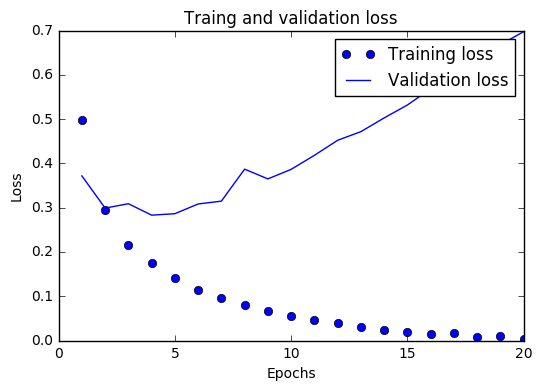

In [38]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_value, 'b', label = 'Validation loss')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

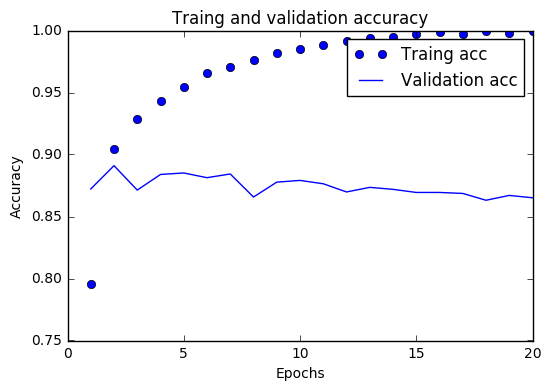

In [40]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Traing acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Traing and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

说明随着训练次数的增加，模型逐渐过拟合，在训练数据上的表现越来越好，而在验证集上的表现越来越差

In [50]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(x_train,
         y_train,
         epochs = 5,
         batch_size = 512)

results = model.evaluate(x_test, y_test)

history = history.history

Epoch 1/5
25000/25000 [==============================] - 4s 151us/step - loss: 0.4575 - acc: 0.8237
Epoch 2/5
25000/25000 [==============================] - 4s 155us/step - loss: 0.2600 - acc: 0.9080
Epoch 3/5
25000/25000 [==============================] - 4s 150us/step - loss: 0.2002 - acc: 0.9274
Epoch 4/5
25000/25000 [==============================] - 3s 139us/step - loss: 0.1688 - acc: 0.9391
Epoch 5/5
25000/25000 [==============================] - 4s 160us/step


In [53]:
history

{'acc': [0.8237200004768371,
  0.9079599998855591,
  0.9273599999809266,
  0.9391200003623963,
  0.9485999995422363],
 'loss': [0.4575491483402252,
  0.2600343820428848,
  0.2002297877216339,
  0.1688430426645279,
  0.14621739169597625]}

In [54]:
results

[0.31025695793628694, 0.88012]

In [55]:
model.predict(x_test)

array([[0.15583926],
       [0.99996245],
       [0.85276574],
       ...,
       [0.14225517],
       [0.04339432],
       [0.58050853]], dtype=float32)